<h1>SMS SPAM DETECTION MODEL</h1>

<p>In this project we are trying to make a model to classify a message as spam or ham</p>
<p>In that model we will train and test data using different machine learning algorithms and find out which algorithm works best in this dataset</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
##Importing all the required libraries
#%pip install ipykernel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [5]:
#Loading dataset
data = pd.read_csv("/content/drive/MyDrive/sms_spam_detection-master/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#Droping unwanted columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

#Naming the columns
data = data.rename(columns = {'v1':'label','v2':'message'})


In [7]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
#Calculating the lenght of all the messages
data['lenght']=data['message'].apply(len)
data.head()


,label,message,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
data.describe()

,lenght
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

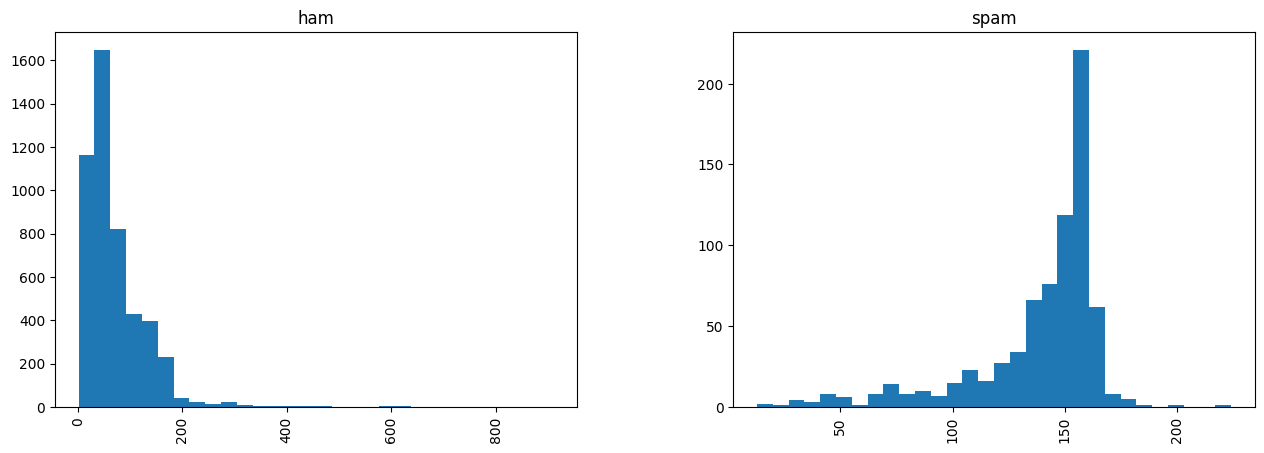

In [11]:
%matplotlib inline

#Plotting the lenght of ham and spam messages
data.hist(by='label',column='lenght',bins=30,figsize=[15,5])

<p>From this plot we can say that spam messages are much more long than ham messages on an average</p>


In [12]:
#Converting our labels to numeric labels
# ham = 0 and spam = 1
data['label_num']=data.label.map({'ham':0,'spam':1})
data.head()

,label,message,lenght,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


In [13]:
#loading our features and target to train
x = data.message
y = data.label_num


In [14]:
#Now we have 5572 labels for 5572 features
#spliting data into 75% test and 25% into train which is by default
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)


In [15]:
vect = CountVectorizer()
#converting features into numeric vector
X_train = vect.fit_transform(x_train)
#converting target into numeric vector
X_test = vect.transform(x_test)





In [16]:
#Loading all classifier
svc = SVC(kernel = 'linear')
mnb = MultinomialNB(alpha =0.2)
gnb  = GaussianNB()
lr = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
abc = AdaBoostClassifier(n_estimators =100,random_state=11)

In [17]:
#defining functions for training and testing data

def training(clf,x_train,Y_train):
    clf.fit(x_train,Y_train)

#function for predicting labels

def predict(clf,X_test):
    return clf.predict(X_test)

In [18]:
#defining a dictionary of classifier
classifier={'SVM': svc , 'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc}

In [21]:
#predict and storing score of each classifier
score = []
for n,c in classifier.items():
    training(c,X_train.toarray(),y_train)
    pred = predict(c,X_test.toarray())
    score.append((n,[accuracy_score(y_test,pred,normalize=True)]))

#Creating a dictionary from the score list
score_dict = dict(score)

#Creating a DataFrame using from_dict
score_df = pd.DataFrame.from_dict(score_dict, orient='index', columns=['scores'])

#Adding accuracy column
score_df['Accuracy (%)'] = score_df['scores'] * 100
score_df

,scores,Accuracy (%)
SVM,0.989232,98.923187
MultinomialNB,0.988514,98.851400
GaussianNB,0.898062,89.806174
logistic,0.987078,98.707825
RandomForest,0.985642,98.564250
Adaboost,0.959799,95.979899


<p>We can see svm has the best accuracy of 0.989 followed by multinomial naiye bayes which have accuracy of 0.988</p>

<p>Also notice that Gaussian NB work very poorly</p>

In [ ]:
##Find out time taken by each classifier
##remove stopwords and train again
##use GridSearchCV to tune algorithms

In [22]:
 #Implementing K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with k=5 (can be tuned)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9268


In [ ]:
#conda create --name tf_env python=3.10


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization and Sequence Padding
max_words = 5000  # Vocabulary size
max_len = 100  # Max sequence length

# Use the original text data 'x' for tokenization, not the vectorized data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)  # Pass x_train which contains the raw text data
X_train_seq = tokenizer.texts_to_sequences(x_train)  # Pass x_train for sequencing
X_test_seq = tokenizer.texts_to_sequences(x_test)  # Pass x_test for sequencing

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to numerical format
y_train_bin = (y_train == 'spam').astype(int)  # Assuming y_train is a pandas Series
y_test_bin = (y_test == 'spam').astype(int)  # Assuming y_test is a pandas Series


# Build RNN Model
rnn_model = Sequential([
    Embedding(max_words, 32, input_length=max_len),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(16),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train_pad, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_bin))

# Evaluate RNN Model
rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test_bin, verbose=0)[1]
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

# Build LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    SpatialDropout1D(0.3),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_bin))

# Evaluate LSTM Model
lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test_bin, verbose=0)[1]
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.9671 - loss: 0.1335 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0014
RNN Accuracy: 1.0000
Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 27s 166ms/step - accuracy: 0.9626 - loss: 0.1917 - val_accuracy: 1.0000 - val_loss: 2.6574e-04
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 1.0000 - loss: 2.4098e-04 - val_accuracy: 1.0000 - val_loss: 1.2306e-04
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 1.0000 

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_message_lstm(message, tokenizer, lstm_model, max_len=100):
    """Predicts whether a message is spam or ham using the trained LSTM model."""

    # Tokenize and pad the message
    sequence = tokenizer.texts_to_sequences([message])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Make prediction
    prediction = lstm_model.predict(padded_sequence)[0][0]

    # Interpret prediction
    if prediction < 0.5:
        return "HAM"
    else:
        return "SPAM"

# Get user input
user_message = input("Enter a message: ")

# Predict and print the result
result = predict_message_lstm(user_message, tokenizer, lstm_model)
print(f"The message is classified as: {result}")

Enter a message: Hi Nitya Lanka, you missed the Career seminar today, Call 18002587332 to reschedule your appointment. Hurry up as we have limited scholarship seats-Frankfinn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
The message is classified as: HAM


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_message_lstm(message, tokenizer, lstm_model, max_len=100):
    """Predicts whether a message is spam or ham using the trained LSTM model."""

    # Tokenize and pad the message
    sequence = tokenizer.texts_to_sequences([message])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Make prediction
    prediction = lstm_model.predict(padded_sequence)[0][0]

    # Interpret prediction
    if prediction < 0.5:
        return "HAM"
    else:
        return "SPAM"

# Get user input
user_message = input("Enter a message: ")

# Predict and print the result
result = predict_message_lstm(user_message, tokenizer, lstm_model)
print(f"The message is classified as: {result}")

Enter a message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The message is classified as: HAM


In [32]:
'''!pip install tensorflow
from google.colab import drive
drive.mount('/content/drive')'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load and preprocess the data (including augmenting the data)
data = pd.read_csv("/content/drive/MyDrive/sms_spam_detection-master/spam.csv", encoding='latin-1')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Augment training data with the example spam message
new_spam_messages = [
    "Congratulations! You've won a free cruise! Call 555-123-4567 now to claim your prize. Limited time offer!",
    # Add more similar spam messages here if needed
]
new_spam_df = pd.DataFrame({'label': ['spam'] * len(new_spam_messages), 'message': new_spam_messages})
data = pd.concat([data, new_spam_df], ignore_index=True)

# Split the data into training and testing sets
x = data.message
y = data.label_num
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)

# Tokenization and padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.message)  # Fit on the entire dataset
X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert labels to numerical format
y_train_bin = (y_train == 1).astype(int)
y_test_bin = (y_test == 1).astype(int)

# Build and train the LSTM model
lstm_model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    SpatialDropout1D(0.3),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train_bin, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_bin))

# Prediction function
def predict_message_lstm(message, tokenizer, lstm_model, max_len=100):
    sequence = tokenizer.texts_to_sequences([message])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = lstm_model.predict(padded_sequence)[0][0]
    return "SPAM" if prediction > 0.5 else "HAM"

# Get user input and predict
user_message = input("Enter a message: ")
result = predict_message_lstm(user_message, tokenizer, lstm_model)
print(f"The message is classified as: {result}")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


131/131 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - accuracy: 0.8849 - loss: 0.3603 - val_accuracy: 0.9842 - val_loss: 0.0675
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.9810 - loss: 0.0753 - val_accuracy: 0.9892 - val_loss: 0.0464
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9884 - loss: 0.0402 - val_accuracy: 0.9928 - val_loss: 0.0384
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9940 - loss: 0.0235 - val_accuracy: 0.9907 - val_loss: 0.0403
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - accuracy: 0.9952 - loss: 0.0225 - val_accuracy: 0.9914 - val_loss: 0.0432
Enter a message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
The message is classified as: SPAM


In [33]:
user_message = input("Enter a message: ")
result = predict_message_lstm(user_message, tokenizer, lstm_model)
print(f"The message is classified as: {result}")

Enter a message: U dun say so early hor... U c already then say...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The message is classified as: HAM
